In [1]:
import numpy as np
import util
import pickle
from NN2 import NeuralNetwork

## 1. Data Loading 

In [2]:
classification_train_data = util.load_data("./data/classification_train_data.pkl")
classification_train_label = util.load_data("./data/classification_train_label.pkl")
classification_test_data = util.load_data("./data/classification_test_data.pkl")

## 2. Data Exploration

In [3]:
print("Classification Train Data Shape:", classification_train_data.shape)
print("Classification Train Label Shape:", classification_train_label.shape)
print("Classification Test Data Shape:", classification_test_data.shape)

Classification Train Data Shape: (49976, 257)
Classification Train Label Shape: (49976, 2)
Classification Test Data Shape: (9997, 257)


## 3. Data Preprocessing

In [4]:
# remove index column
train_data_index = classification_train_data[:, 0]
train_label_index = classification_train_label[:, 0]
test_data_index = classification_test_data[:, 0]
classification_train_data = classification_train_data[:, 1:]
classification_train_label = classification_train_label[:, 1:].reshape(-1)
classification_test_data = classification_test_data[:, 1:]

In [5]:
classification_train_data.shape, classification_train_label.shape, classification_test_data.shape

((49976, 256), (49976,), (9997, 256))

In [6]:
train_data_index.shape, train_label_index.shape, test_data_index.shape

((49976,), (49976,), (9997,))

In [7]:
# normalization

# calculate the mean and standard deviation of each column
mean = np.mean(classification_train_data, axis=0)
std_dev = np.std(classification_train_data, axis=0)

# Z-Score normalizes each column
classification_train_data = (classification_train_data - mean) / std_dev
classification_test_data = (classification_test_data - mean) / std_dev

In [8]:
# label one-hot encoding
num_classes =  10 
classification_train_label = np.eye(num_classes)[classification_train_label]
print("train label shape:", classification_train_label.shape)

train label shape: (49976, 10)


## 4. Dataset Splitting

In [9]:
# divide the data set into training set and validation set
train_ratio = 0.8
seed = 123
(train_data, train_labels), (validation_data, validation_labels) = util.split_train_validation(
    classification_train_data, classification_train_label,
    train_ratio=train_ratio, random_seed=seed
    )

In [10]:
train_data.shape, train_labels.shape, validation_data.shape, validation_labels.shape

((39980, 256), (39980, 10), (9996, 256), (9996, 10))

# 5. Model

In [11]:
# Initialize and train the model
nn_model = NeuralNetwork(
    hidden_units=20,num_classes=num_classes, learning_rate=0.06, num_iterations=260,decay_rate=0.993,dropout_prob=0.0)

In [12]:
0.06*(0.994**300)

0.009864306762259441

## 6. Train 

In [13]:
train_losses, val_losses, train_accuracies, val_accuracies = nn_model.fit(
    X_train=train_data, y_train=train_labels, 
    X_val=validation_data, y_val=validation_labels
    )

Epoch 1: accuracy = 0.13797704830531093, val_accuracy = 0.13445378151260504
Epoch 11: accuracy = 0.42482319188684275, val_accuracy = 0.4192677070828331
Epoch 21: accuracy = 0.49001701361088873, val_accuracy = 0.46608643457382953
Epoch 31: accuracy = 0.5139111289031225, val_accuracy = 0.48149259703881553
Epoch 41: accuracy = 0.5281058179877235, val_accuracy = 0.48699479791916767
Epoch 51: accuracy = 0.5371714037896984, val_accuracy = 0.49049619847939174
Epoch 61: accuracy = 0.5421253669602348, val_accuracy = 0.49349739895958383
Epoch 71: accuracy = 0.546328729650387, val_accuracy = 0.4959983993597439
Epoch 81: accuracy = 0.549631371764078, val_accuracy = 0.501000400160064
Epoch 91: accuracy = 0.5510491726714705, val_accuracy = 0.5037014805922368
Epoch 101: accuracy = 0.5529173338670936, val_accuracy = 0.5056022408963585
Epoch 111: accuracy = 0.5555194155324259, val_accuracy = 0.5046018407362945
Epoch 121: accuracy = 0.5564951961569256, val_accuracy = 0.506702681072429
Epoch 131: accurac

In [14]:
train_accuracies[-1], val_accuracies[-1]

(0.5727582065652522, 0.5150060024009604)

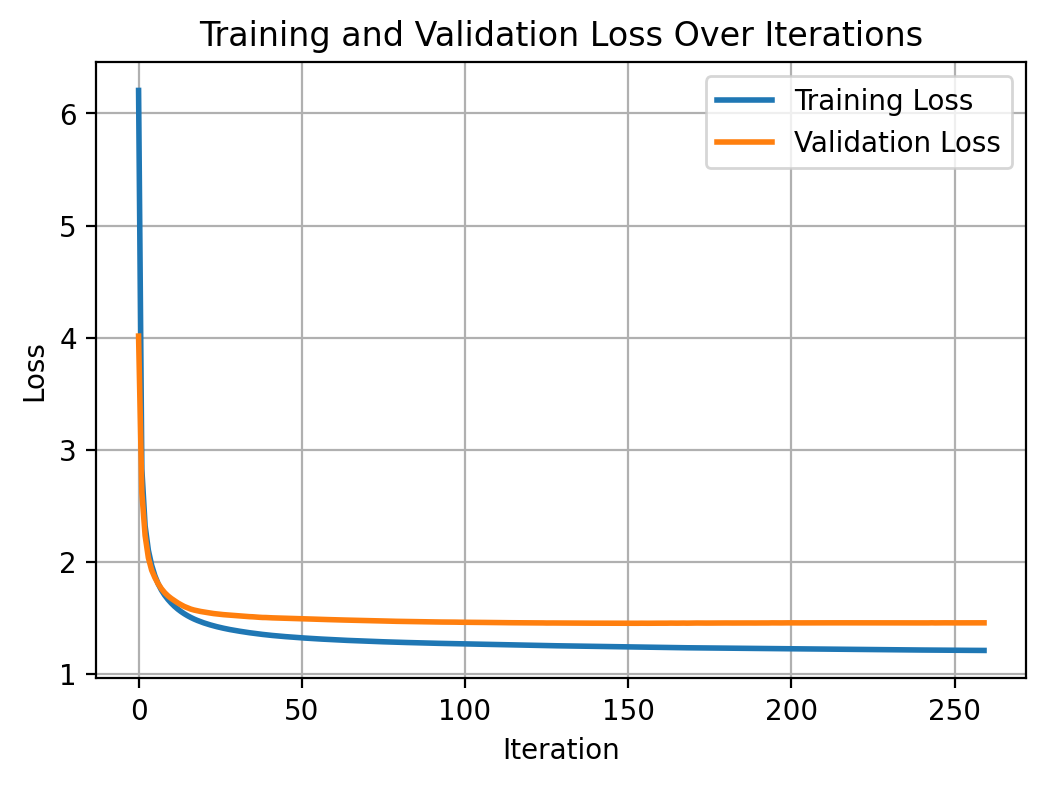

In [15]:
util.plot_loss_curves(train_losses=train_losses, val_losses=val_losses)

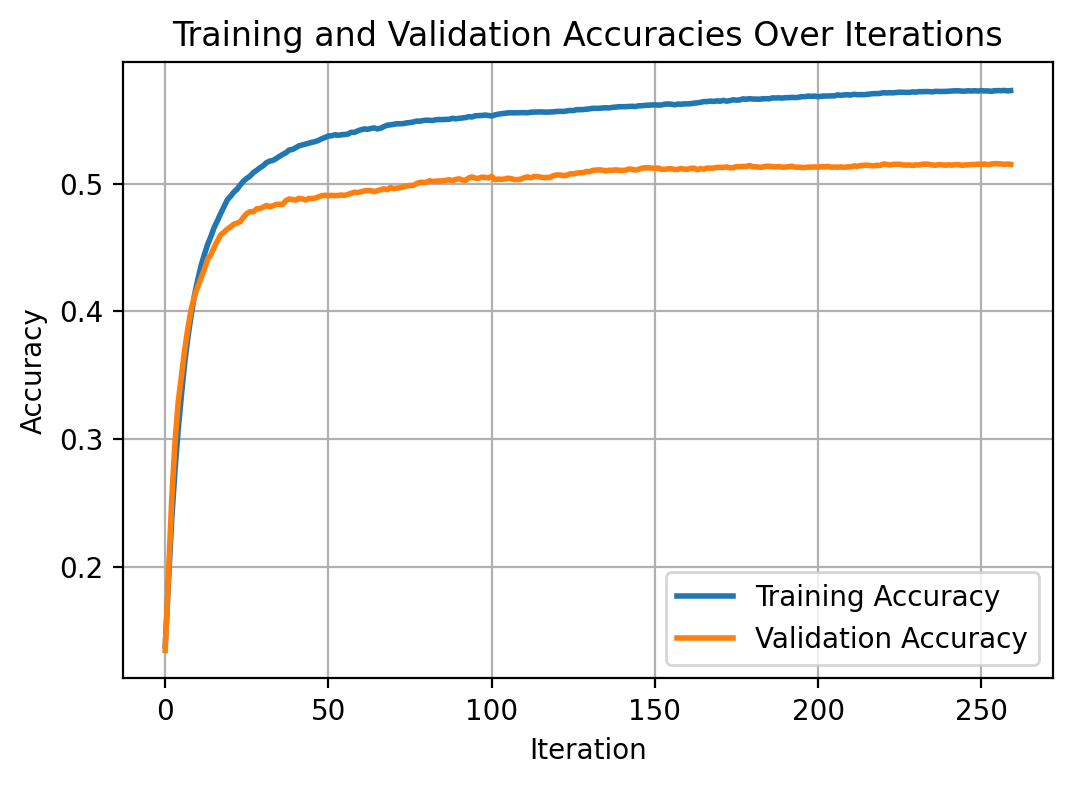

In [16]:
util.plot_acc_curves(train_acc=train_accuracies, val_acc=val_accuracies)

## 7. Predict

In [17]:
test_label_predict = nn_model.predict(classification_test_data)

In [18]:
# merge index and corresponding classification results 
submit_data = np.hstack((
    test_data_index.reshape(-1, 1),
    test_label_predict.reshape(-1, 1)
    ))

In [19]:
submit_data.shape

(9997, 2)

In [20]:
util.save_data('./nn_classification_results_12110517.pkl', submit_data)

Saved successfully
